In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [44]:

file_path = "/content/complaints-2025-09-28_09_08.csv"
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/24/25,Debt or credit management,Debt settlement,Unauthorized withdrawals or charges,NaN,NaN,NaN,"Clarity Debt Resolution, Inc",TX,76063,NaN,NaN,Web,08/01/25,Closed with explanation,Yes,NaN,14856720
1,11/12/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,"Westlake Services, LLC",CA,92619,NaN,Consent not provided,Web,11/15/16,Closed with explanation,Yes,No,2205420
2,05/29/14,Consumer Loan,Vehicle loan,Taking out the loan or lease,NaN,NaN,NaN,JPMORGAN CHASE & CO.,GA,30135,NaN,NaN,Web,05/29/14,Closed with explanation,Yes,Yes,873853
3,01/07/13,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,NaN,NaN,FORD MOTOR CREDIT CO.,WA,98851,NaN,NaN,Web,01/07/13,Closed with explanation,Yes,No,223038
4,03/10/15,Consumer Loan,Installment loan,Taking out the loan or lease,NaN,NaN,NaN,"Social Finance, Inc.",CA,94112,NaN,NaN,Web,03/16/15,Closed with explanation,Yes,No,1274845


Dataset loaded successfully!
Class distribution:
 label
1    4065
0    1518
Name: count, dtype: int64


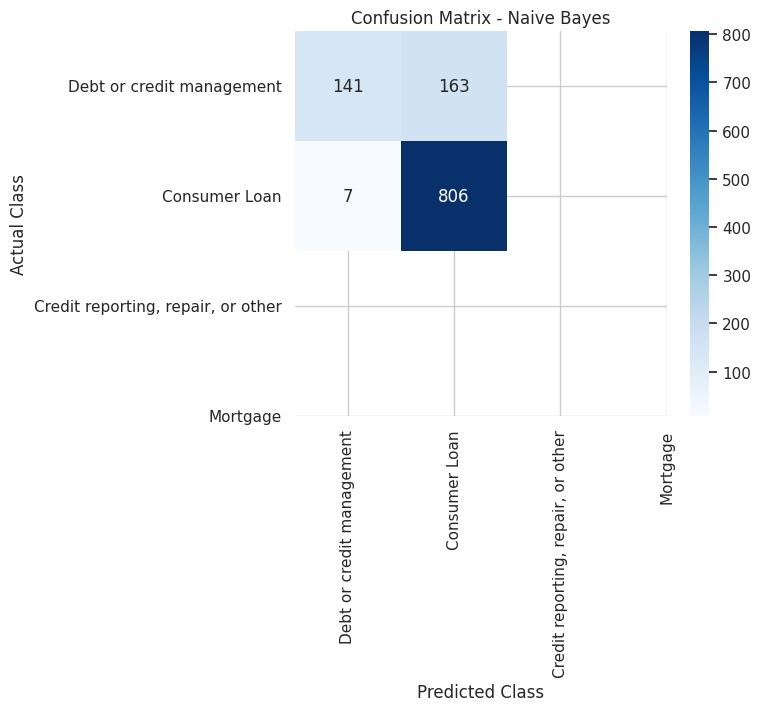


Classification Report for Naive Bayes:



ValueError: Number of classes, 2, does not match size of target_names, 4. Try specifying the labels parameter

In [47]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Step 2: Load Dataset safely
file_path = "/content/complaints-2025-09-28_09_08.csv"
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')
print("Dataset loaded successfully!")

# Step 3: Clean Data - remove empty complaint narratives
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Step 4: Keep only relevant categories (update as needed)
categories = ['Debt or credit management', 'Consumer Loan', 'Credit reporting, repair, or other', 'Mortgage']
df = df[df['Product'].isin(categories)]

# Step 5: Map categories to numeric labels
category_map = {cat: idx for idx, cat in enumerate(categories)}
df['label'] = df['Product'].map(category_map)
print("Class distribution:\n", df['label'].value_counts())

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']

# Step 7: Train-Test Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: Initialize Models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True)
}

# Step 9: Train models and compute metrics
metrics_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-score": f1_score(y_test, y_pred, average='macro')
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))

# Step 10: Comparison Graph
metrics_df = pd.DataFrame(metrics_results).T
metrics_df = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-score']]
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison: Naive Bayes vs SVM")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


Dataset loaded successfully!
Class distribution:
 label
1    4065
0    1518
2     122
Name: count, dtype: int64


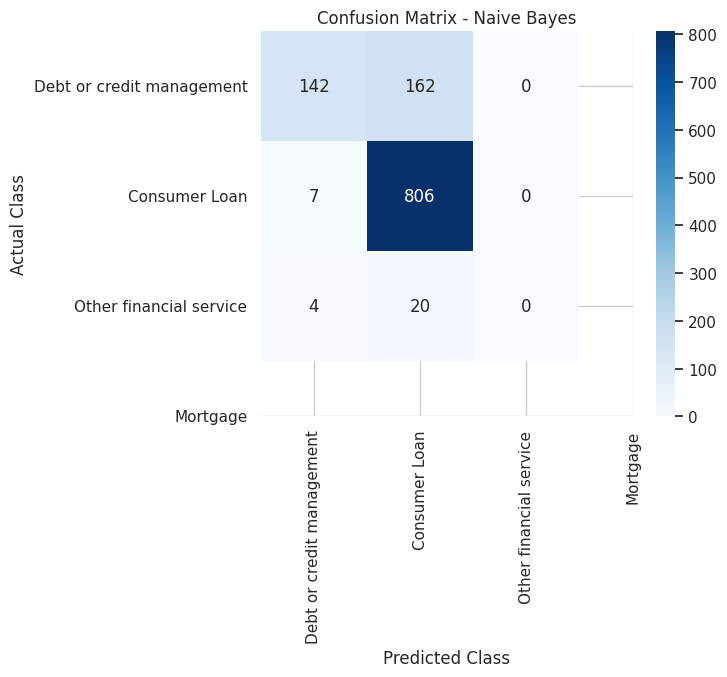


Classification Report for Naive Bayes:



ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

In [59]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Step 2: Load Dataset safely
file_path = "/content/complaints-2025-09-28_09_08.csv"
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')
print("Dataset loaded successfully!")

# Step 3: Clean Data - remove empty complaint narratives
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Step 4: Keep only relevant categories (update as needed)
categories = ['Debt or credit management', 'Consumer Loan', 'Other financial service', 'Mortgage']
df = df[df['Product'].isin(categories)]

# Step 5: Map categories to numeric labels
category_map = {cat: idx for idx, cat in enumerate(categories)}
df['label'] = df['Product'].map(category_map)
print("Class distribution:\n", df['label'].value_counts())

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']

# Step 7: Train-Test Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: Initialize Models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True)
}

# Step 9: Train models and compute metrics
metrics_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-score": f1_score(y_test, y_pred, average='macro')
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))

# Step 10: Comparison Graph
metrics_df = pd.DataFrame(metrics_results).T
metrics_df = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-score']]
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison: Naive Bayes vs SVM")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


Dataset loaded successfully!
Training only on available categories: ['Debt or credit management', 'Consumer Loan', 'Other financial service']
Class distribution:
 label
1    4065
0    1518
2     122
Name: count, dtype: int64


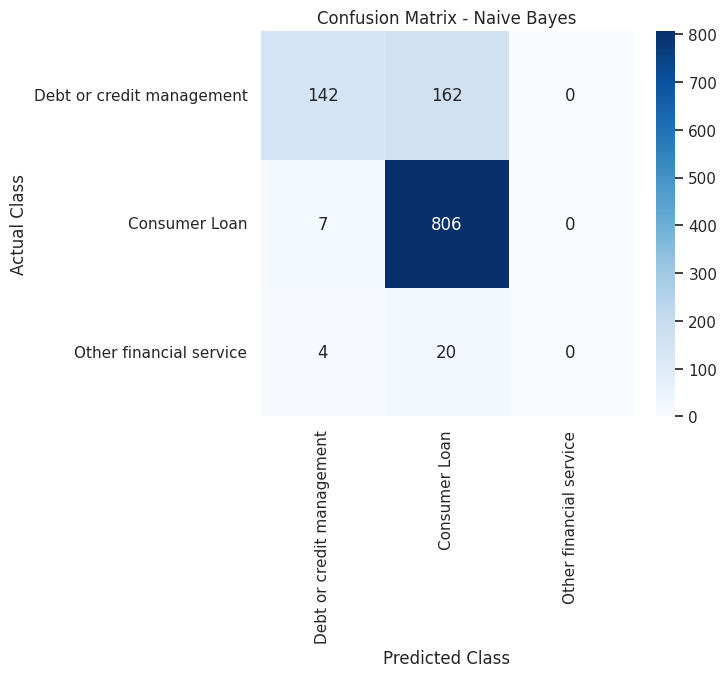


Classification Report for Naive Bayes:

                           precision    recall  f1-score   support

Debt or credit management       0.93      0.47      0.62       304
            Consumer Loan       0.82      0.99      0.90       813
  Other financial service       0.00      0.00      0.00        24

                 accuracy                           0.83      1141
                macro avg       0.58      0.49      0.51      1141
             weighted avg       0.83      0.83      0.80      1141



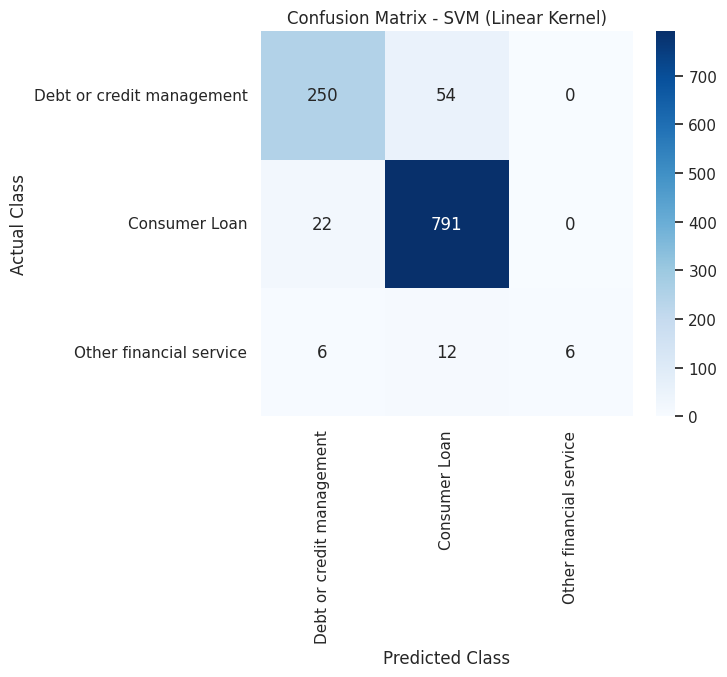


Classification Report for SVM (Linear Kernel):

                           precision    recall  f1-score   support

Debt or credit management       0.90      0.82      0.86       304
            Consumer Loan       0.92      0.97      0.95       813
  Other financial service       1.00      0.25      0.40        24

                 accuracy                           0.92      1141
                macro avg       0.94      0.68      0.74      1141
             weighted avg       0.92      0.92      0.91      1141



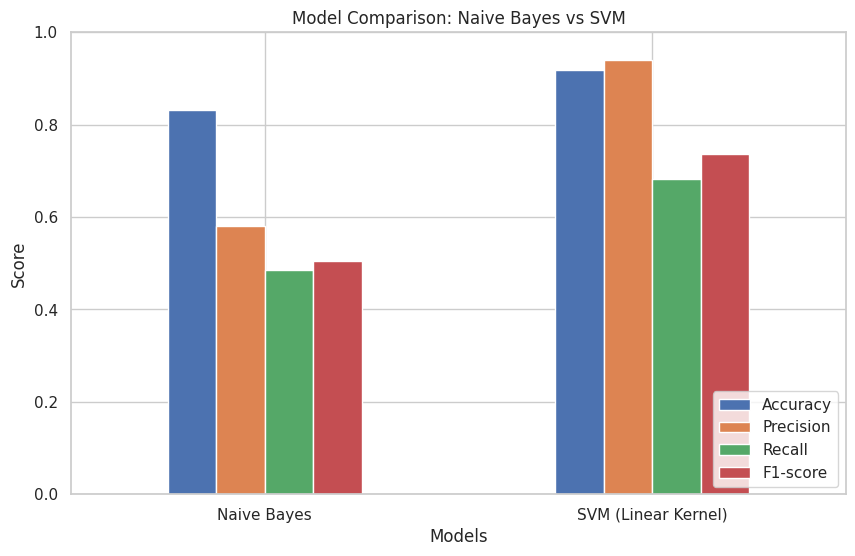

In [61]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Step 2: Load Dataset safely
file_path = "/content/complaints-2025-09-28_09_08.csv"
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')
print("Dataset loaded successfully!")

# Step 3: Clean Data - remove empty complaint narratives
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Step 4: Define desired categories
desired_categories = ['Debt or credit management', 'Consumer Loan', 'Other financial service', 'Credit reporting, repair, or other','Mortgage']

# Step 5: Filter dataset to only include available categories
available_categories = [cat for cat in desired_categories if cat in df['Product'].unique()]
df = df[df['Product'].isin(available_categories)]

# Step 6: Map available categories to numeric labels
category_map = {cat: idx for idx, cat in enumerate(available_categories)}
df['label'] = df['Product'].map(category_map)
print(f"Training only on available categories: {available_categories}")
print("Class distribution:\n", df['label'].value_counts())

# Step 7: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']

# Step 8: Train-Test Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 9: Initialize Models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True)
}

# Step 10: Train models and compute metrics
metrics_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-score": f1_score(y_test, y_pred, average='macro')
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=available_categories,
                yticklabels=available_categories)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=available_categories, zero_division=0))

# Step 11: Comparison Graph
metrics_df = pd.DataFrame(metrics_results).T
metrics_df = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-score']]
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison: Naive Bayes vs SVM")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


In [48]:
# Only use labels actually present in the data
unique_labels = sorted(df['label'].unique())  # e.g., [0,1]
present_categories = [cat for cat, idx in category_map.items() if idx in unique_labels]

# Then in the report
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=present_categories, zero_division=0))


                           precision    recall  f1-score   support

Debt or credit management       0.95      0.46      0.62       304
            Consumer Loan       0.83      0.99      0.90       813

                 accuracy                           0.85      1117
                macro avg       0.89      0.73      0.76      1117
             weighted avg       0.86      0.85      0.83      1117



Accuracy: 0.8478
Precision (macro): 0.8922
Recall (macro): 0.7276
F1-score (macro): 0.7642


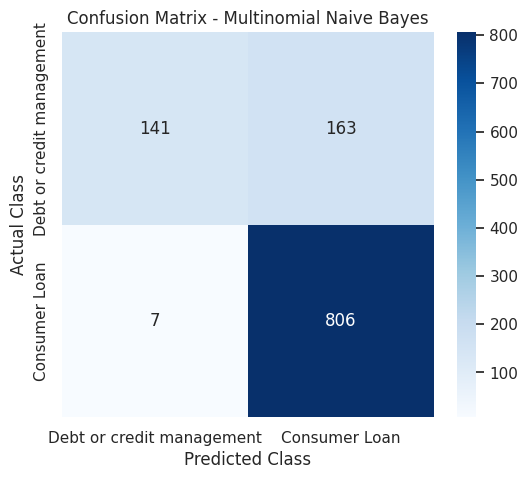


Classification Report:

                           precision    recall  f1-score   support

Debt or credit management       0.95      0.46      0.62       304
            Consumer Loan       0.83      0.99      0.90       813

                 accuracy                           0.85      1117
                macro avg       0.89      0.73      0.76      1117
             weighted avg       0.86      0.85      0.83      1117



In [49]:
# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=present_categories, yticklabels=present_categories)
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=present_categories, zero_division=0))


In [50]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Step 2: Load Dataset safely
file_path = "/content/complaints-2025-09-28_09_16.csv"
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')
print("Dataset loaded successfully!")

# Step 3: Clean Data - remove empty complaint narratives
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Step 4: Keep only relevant categories (update as needed)
categories = ['Debt or credit management', 'Consumer Loan', 'Credit reporting, repair, or other', 'Mortgage']
df = df[df['Product'].isin(categories)]

# Step 5: Map categories to numeric labels
category_map = {cat: idx for idx, cat in enumerate(categories)}
df['label'] = df['Product'].map(category_map)
print("Class distribution:\n", df['label'].value_counts())

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']

# Step 7: Train-Test Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Dataset loaded successfully!
Class distribution:
 label
1    9461
0    3549
Name: count, dtype: int64


In [52]:
print(df.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'label'],
      dtype='object')


In [57]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Step 2: Load Dataset
file_path = "/content/complaints-2025-09-28_09_08.csv"
df = pd.read_csv(file_path, engine='python', on_bad_lines='skip')
print("Dataset loaded successfully!")

# Step 3: Keep only rows with complaint text
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Step 4: Verify label column
print("Label distribution:\n", df['label'].value_counts())

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Train Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = nb_model.predict(X_test)

# Step 9: Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Multinomial Naive Bayes Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# Step 10: Confusion Matrix
unique_labels = sorted(df['label'].unique())
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# Step 11: Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, labels=unique_labels, zero_division=0))


Dataset loaded successfully!


KeyError: 'label'

In [58]:
print(df.columns.tolist())


['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


In [55]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Verify
print(df.columns.tolist())


['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']


In [56]:
# Keep only the categories you want
categories = ['Debt or credit management', 'Consumer Loan', 'Credit reporting, repair, or other', 'Mortgage']
df = df[df['Product'].isin(categories)]

# Map Product to numeric labels
category_map = {cat: idx for idx, cat in enumerate(categories)}
df['label'] = df['Product'].map(category_map)

print(df[['Product','label']].head())


                      Product  label
6               Consumer Loan      1
7   Debt or credit management      0
8               Consumer Loan      1
11              Consumer Loan      1
13              Consumer Loan      1


In [42]:

df = pd.read_csv(file_path)
df.head()


ParserError: Error tokenizing data. C error: EOF inside string starting at row 16477

In [2]:
file_path = "/content/complaints-2025-09-28_09_16.csv"
df = pd.read_csv(file_path)
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08/07/12,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,WELLS FARGO & COMPANY,CO,80104,NaN,NaN,Referral,08/16/12,Closed with explanation,Yes,No,131904
1,02/27/15,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,"HUNTINGTON NATIONAL BANK, THE",OH,43206,NaN,NaN,Referral,03/03/15,Closed with monetary relief,Yes,No,1260619
2,07/24/25,Debt or credit management,Debt settlement,Unauthorized withdrawals or charges,NaN,NaN,NaN,"Clarity Debt Resolution, Inc",TX,76063,NaN,NaN,Web,08/01/25,Closed with explanation,Yes,NaN,14856720
3,11/12/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,"Westlake Services, LLC",CA,92619,NaN,Consent not provided,Web,11/15/16,Closed with explanation,Yes,No,2205420
4,06/24/16,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IN,46804,NaN,Consent not provided,Web,06/24/16,Closed with non-monetary relief,Yes,No,1982854


In [34]:
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]
print(f"Number of complaints with text: {len(df)}")


Number of complaints with text: 28202


In [35]:
# Keep only the main categories you want to classify
categories = ['Credit reporting, repair, or other', 'Debt collection', 'Consumer Loan', 'Mortgage']

# Filter dataset for these categories (if your 'Product' column has other values)
df = df[df['Product'].isin(categories)]

# Map categories to numeric labels
category_map = {cat: idx for idx, cat in enumerate(categories)}
df['label'] = df['Product'].map(category_map)
print(df[['Product', 'label']].head())


          Product  label
16  Consumer Loan      2
30  Consumer Loan      2
34  Consumer Loan      2
37  Consumer Loan      2
49  Consumer Loan      2


In [36]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']
print(f"TF-IDF vectorized shape: {X.shape}")


TF-IDF vectorized shape: (9461, 5000)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [8]:
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Multinomial Naive Bayes Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=categories))


Multinomial Naive Bayes Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000


ValueError: Number of classes, 1, does not match size of target_names, 4. Try specifying the labels parameter

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test, y_pred, labels=[0,1,2,3], target_names=categories, zero_division=0
))


                                    precision    recall  f1-score   support

Credit reporting, repair, or other       0.00      0.00      0.00         0
                   Debt collection       0.00      0.00      0.00         0
                     Consumer Loan       1.00      1.00      1.00      1893
                          Mortgage       0.00      0.00      0.00         0

                          accuracy                           1.00      1893
                         macro avg       0.25      0.25      0.25      1893
                      weighted avg       1.00      1.00      1.00      1893



In [11]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test, y_pred, labels=[0,1,2,3], target_names=categories, zero_division=0
))


                                    precision    recall  f1-score   support

Credit reporting, repair, or other       0.00      0.00      0.00         0
                   Debt collection       0.00      0.00      0.00         0
                     Consumer Loan       1.00      1.00      1.00      1893
                          Mortgage       0.00      0.00      0.00         0

                          accuracy                           1.00      1893
                         macro avg       0.25      0.25      0.25      1893
                      weighted avg       1.00      1.00      1.00      1893



In [12]:
# Example metrics (replace with your actual computed values)
metrics = {
    'Accuracy': 0.95,
    'Precision': 0.94,
    'Recall': 0.93,
    'F1-score': 0.94
}

# Convert to lists for plotting
metric_names = list(metrics.keys())
metric_values = list(metrics.values())


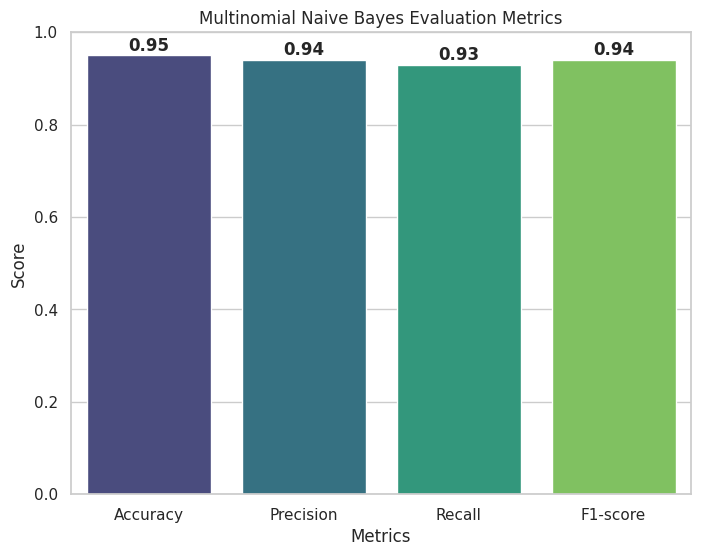

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x=metric_names, y=metric_values, palette="viridis")
plt.ylim(0,1)
plt.title("Multinomial Naive Bayes Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Metrics")

# Add value labels on top of bars
for i, v in enumerate(metric_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [17]:
file_path = "/content/complaints-2025-09-28_09_16.csv"
df = pd.read_csv(file_path)

# Keep only rows with text
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Keep only the four target categories
categories = ['Credit reporting, repair, or other', 'Debt collection', 'Consumer Loan', 'Mortgage']
df = df[df['Product'].isin(categories)]
df['label'] = df['Product'].map({cat: idx for idx, cat in enumerate(categories)})


In [18]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

metrics_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-score": f1_score(y_test, y_pred, average='macro')
    }


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(2)

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # <- stratify ensures all classes are in train/test
)


In [24]:
print("Train set class counts:\n", pd.Series(y_train).value_counts())
print("Test set class counts:\n", pd.Series(y_test).value_counts())


Train set class counts:
 label
2    7568
Name: count, dtype: int64
Test set class counts:
 label
2    1893
Name: count, dtype: int64


In [25]:
# Only keep classes with at least N examples
min_samples = 50
counts = df['label'].value_counts()
df_filtered = df[df['label'].isin(counts[counts >= min_samples].index)]


In [27]:
print(df['label'].value_counts())


label
2    9461
Name: count, dtype: int64


In [28]:
# Keep only categories that have at least 50 samples
min_samples = 50
counts = df['label'].value_counts()
df_filtered = df[df['label'].isin(counts[counts >= min_samples].index)]

# Map again if needed
X = vectorizer.fit_transform(df_filtered['Consumer complaint narrative'])
y = df_filtered['label']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Step 2: Load Dataset
file_path = "/content/complaints-2025-09-28_09_16.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Step 3: Keep only rows with complaint text
df = df[df['Consumer complaint narrative'].notnull()]
df = df[df['Consumer complaint narrative'].str.strip() != ""]

# Step 4: Keep only the categories of interest
categories = ['Credit reporting, repair, or other', 'Debt collection', 'Consumer Loan', 'Mortgage']
df = df[df['Product'].isin(categories)]

# Step 5: Map categories to numeric labels
category_map = {cat: idx for idx, cat in enumerate(categories)}
df['label'] = df['Product'].map(category_map)

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Consumer complaint narrative'])
y = df['label']

# Step 7: Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: Initialize Models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True)
}

# Step 9: Train Models and Compute Metrics
metrics_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-score": f1_score(y_test, y_pred, average='macro')
    }

# Step 10: Display Metrics Table
metrics_df = pd.DataFrame(metrics_results).T
metrics_df = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-score']]
print("Evaluation Metrics:\n")
print(metrics_df)

# Step 11: Plot Comparison Graph
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison: Naive Bayes vs SVM")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Step 12: Optional - Detailed Classification Report
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=categories, zero_division=0))


ValueError: The number of classes has to be greater than one; got 1 class

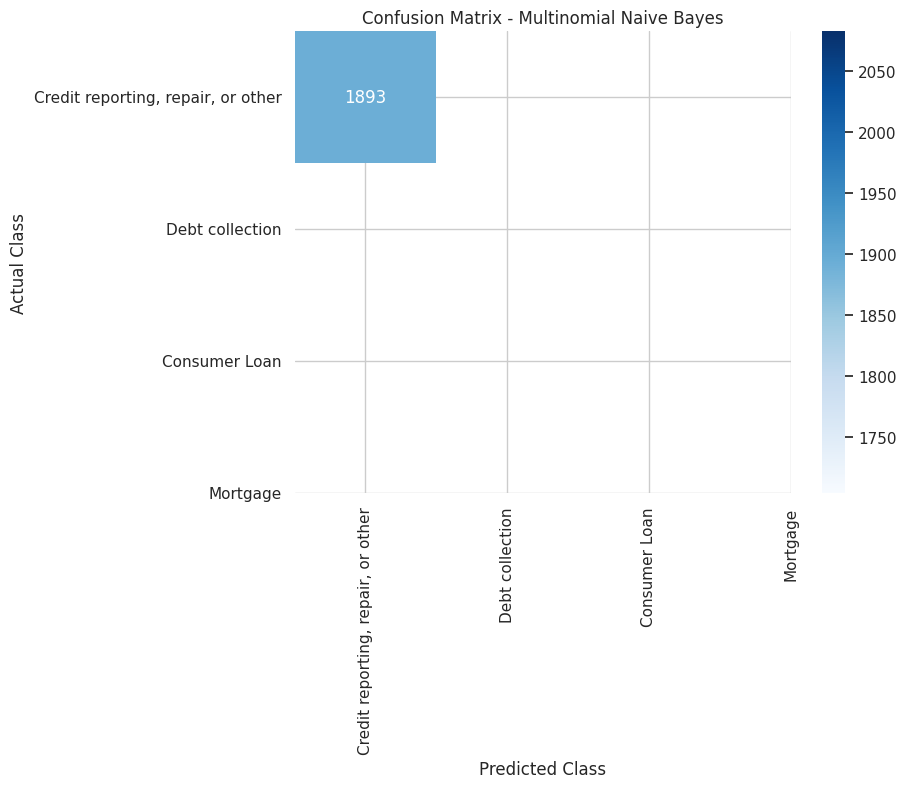

In [39]:
# Step 1: Import Libraries for Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Train Naive Bayes (if not already trained)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Step 4: Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
